## TIISingleQubit Manual Characterisation and Calibration


In [15]:
diagnostics.plotmon.tuids_max_num(6)

In [ ]:
import tii_single_qubit_diagnosis as diagnostics

# diagnostics.tiisq.pi_pulse_length = 50
# diagnostics.tiisq.pi_pulse_gain = 0.5

Starting iterative measurement...
100% completed | elapsed time:     44s | time left:      0s  
100% completed | elapsed time:     44s | time left:      0s  Closing
Starting iterative measurement...
100% completed | elapsed time:     86s | time left:      0s  
100% completed | elapsed time:     86s | time left:      0s  Closing


Resonator Frequency = 7794630000.0
Maximum Voltage Measured = 801.0907233272068 μV
Average Minimum Voltage Measured = 60.888081315818745 μV


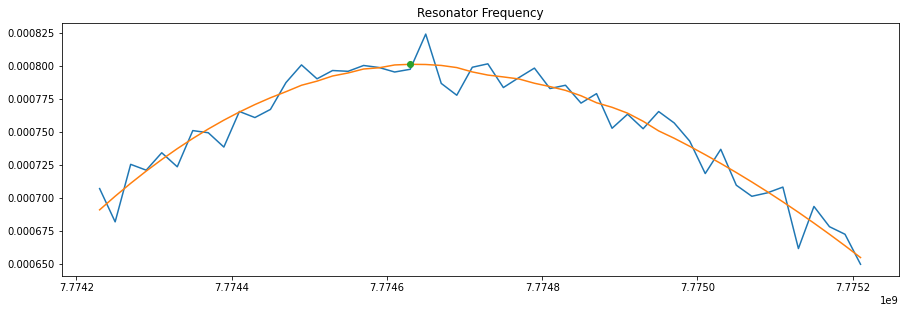

In [11]:
dataset = diagnostics.run_resonator_spectroscopy()


Starting iterative measurement...
100% completed | elapsed time:    123s | time left:      0s  
100% completed | elapsed time:    123s | time left:      0s  Closing
Starting iterative measurement...
100% completed | elapsed time:    475s | time left:      0s  
100% completed | elapsed time:    475s | time left:      0s  Closing
8779000000.0


Qubit Frequency = 8579000000.0
Minimum Voltage Measured = 536.1135905027631 μV


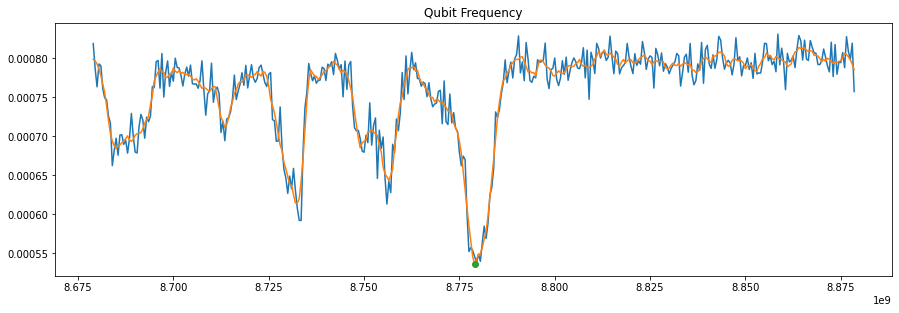

In [18]:
import numpy as np
dataset = diagnostics.run_qubit_spectroscopy(fast_sweep_software_averages = 1, 
                                precision_sweep_software_averages = 2,
                                fast_sweep_scan_range =  np.arange(-700e6, 300e6, 5e6),
                                precision_sweep_scan_range = np.arange(-100e6, 100e6, 0.5e6)
                              )


Starting iterative measurement...
100% completed | elapsed time:    105s | time left:      0s  
100% completed | elapsed time:    105s | time left:      0s  Closing


Pi Pulse Length = 15
T1 = 358.5124221504021 ns
Rabi Oscillations Minimum Voltage Measured = 347.73532679597423 μV


<xarray.Dataset>
Dimensions:  (dim_0: 199)
Coordinates:
    x0       (dim_0) int32 1 2 3 4 5 6 7 8 9 ... 192 193 194 195 196 197 198 199
Dimensions without coordinates: dim_0
Data variables:
    y0       (dim_0) float64 0.000773 0.0007467 ... 0.0004848 0.0004358
    y1       (dim_0) float64 -2.049 -1.962 -1.996 -2.04 ... -2.132 -2.099 -2.093
    y2       (dim_0) float64 -0.0003555 -0.0002845 ... -0.0002443 -0.0002174
    y3       (dim_0) float64 -0.0006864 -0.0006904 ... -0.0004187 -0.0003777
Attributes:
    tuid:                      20220131-163838-692-bf9be9
    name:                      Rabi Pulse Length
    grid_2d:                   False
    grid_2d_uniformly_spaced:  False

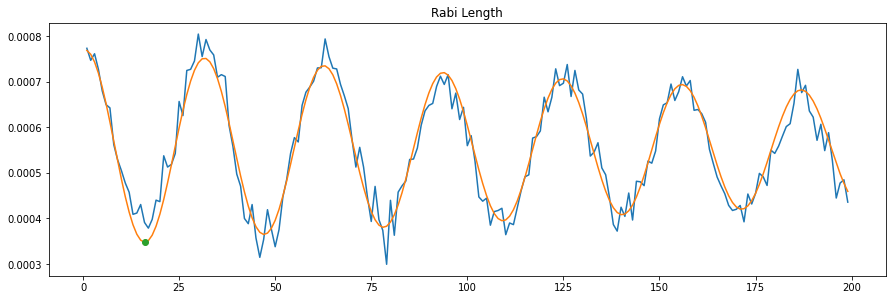

In [21]:
diagnostics.run_Rabi_pulse_length()


In [ ]:
diagnostics.run_Rabi_pulse_gain()


In [ ]:
diagnostics.run_Rabi_pulse_length_and_gain()


In [ ]:
diagnostics.run_Rabi_pulse_length_and_amplitude()

Starting iterative measurement...
100% completed | elapsed time:   1561s | time left:      0s  
100% completed | elapsed time:   1561s | time left:      0s  Closing


T1 = 1842.8974745253201 ns


<xarray.Dataset>
Dimensions:  (dim_0: 1000)
Coordinates:
    x0       (dim_0) int32 0 10 20 30 40 50 60 ... 9940 9950 9960 9970 9980 9990
Dimensions without coordinates: dim_0
Data variables:
    y0       (dim_0) float64 0.0004689 0.0004551 ... 0.0007953 0.0008132
    y1       (dim_0) float64 -2.156 -2.163 -2.147 ... -2.037 -2.036 -2.015
    y2       (dim_0) float64 -0.0002588 -0.000254 ... -0.0003564 -0.0003496
    y3       (dim_0) float64 -0.0003908 -0.0003773 ... -0.0007109 -0.0007341
Attributes:
    tuid:                      20220131-164148-548-9154be
    name:                      T1
    grid_2d:                   False
    grid_2d_uniformly_spaced:  False

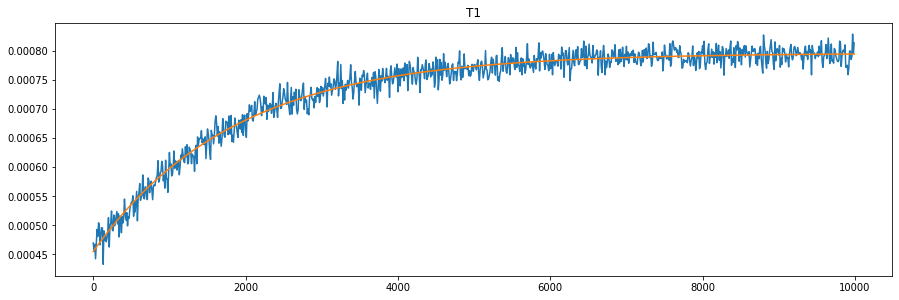

In [22]:
diagnostics.run_t1()


7
Starting iterative measurement...
100% completed | elapsed time:    399s | time left:      0s  
100% completed | elapsed time:    399s | time left:      0s  Closing


Delta Frequency = -8.512776681158432e-09
T2 = 807.0859708596822 ns


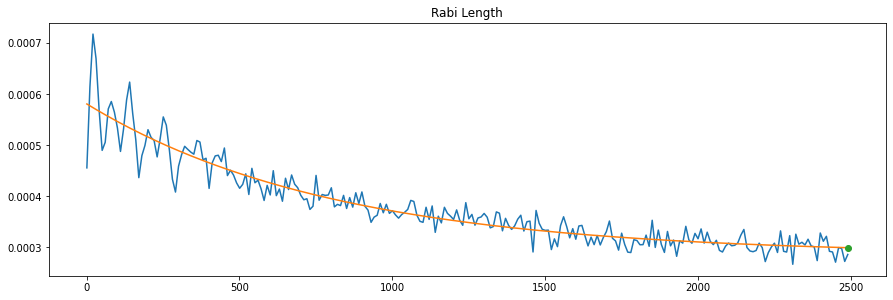

In [23]:
diagnostics.run_ramsey()


In [ ]:
diagnostics.run_spin_echo()

## TIISingleQubit Pulse Sequence Execution

In [ ]:
from qibolab.platforms.tii_single_qubit import TIISingleQubit
from qibolab.circuit import PulseSequence
from qibolab.pulses import BasicPulse, Gaussian, IQReadoutPulse
platform = TIISingleQubit()

calibration_settings = platform.calibration_settings()
qc_pulse = BasicPulse(
    channel = 0,
    start = 0,
    duration = calibration_settings['pi_pulse_duration'],
    amplitude = calibration_settings['pi_pulse_amplitude'],
    frequency = calibration_settings['qc_frequency'],
    phase = 0,
    shape = Gaussian(calibration_settings['pi_pulse_duration']/5)
    )
ro_pulse = IQReadoutPulse(
    channel = 1,
    start = calibration_settings['pi_pulse_duration'] + 4,
    duration = calibration_settings['ro_pulse_duration'],
    amplitude = calibration_settings['ro_pulse_amplitude'],
    frequency = calibration_settings['ro_frequency'],
    phases = 0)
pulse_sequence = PulseSequence([qc_pulse, ro_pulse],) # pulses, duration=experiment.default_pulse_duration, sample_size=experiment.default_sample_size, fixed_readout=True, time_offset=experiment.readout_pulse_duration() + 1e-6):

result = platform.execute(pulse_sequence, nshots = 1000)

In [ ]:
import tii_single_qubit_diagnosis as diagnostics
diagnostics.tiisq.load_default_settings()
diagnostics.tiisq.save_settings_to_file()
diagnostics.tiisq.load_settings_from_file()

In [ ]:
diagnostics.tiisq.load_settings_from_file()

In [ ]:
diagnostics.tiisq.save_settings_to_file()